# V.1 Exploring the green reds

## a) Write a function that will plot a scatterplot matrix of your red wine data.

In [156]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_scatter_matrix(winedata, good_threshold, bad_threshold, save_plot=False):
    c = winedata.columns
    fig, axes = plt.subplots(len(c) - 1, len(c) - 1, figsize=(15, 15))
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, wspace=0, hspace=0)
    for i in range(len(c) - 1):
        for j in range(len(c) - 1):
            ax = axes[i, j]
            p = patches.Rectangle((0, 0), 1, 1, fill=True, transform=ax.transAxes,
                clip_on=False, facecolor='w', zorder=0.1, edgecolor='#000000')
            ax.add_patch(p)
            if (i != j):
                y1 = winedata[winedata['quality'] < bad_threshold][c[i]]
                x1 = winedata[winedata['quality'] < bad_threshold][c[j]]
                y2 = winedata[winedata['quality'] > good_threshold][c[i]]
                x2 = winedata[winedata['quality'] > good_threshold][c[j]]
                min = x1.min()
                if (min > x2.min()):
                    min = x2.min()
                max = x1.max()
                if (max < x2.max()):
                    max = x2.max()
                ax.set_xlim(left=min*0.95, right=max*1.05)
                min = y1.min()
                if (min > y2.min()):
                    min = y2.min()
                max = y1.max()
                if (max < y2.max()):
                    max = y2.max()
                ax.set_ylim(bottom=min*0.95, top=max*1.05)
                ax.scatter(x1, y1, marker='.', s=20, linewidths=0, c='#EC008C')
                ax.scatter(x2, y2, marker='.', s=20, linewidths=0, c='#009E49')
            else:
                ax.text(0.5, 0.5, c[i].replace(' ', '\n'), horizontalalignment='center', verticalalignment='center',
                    transform=ax.transAxes, fontsize='x-large')
            ax.set_axis_off()
    
    if (save_plot == False):
        plt.show()
    else:
       fig.savefig("./matrix.png")


## b) Analyze different chemical factors in red wines 

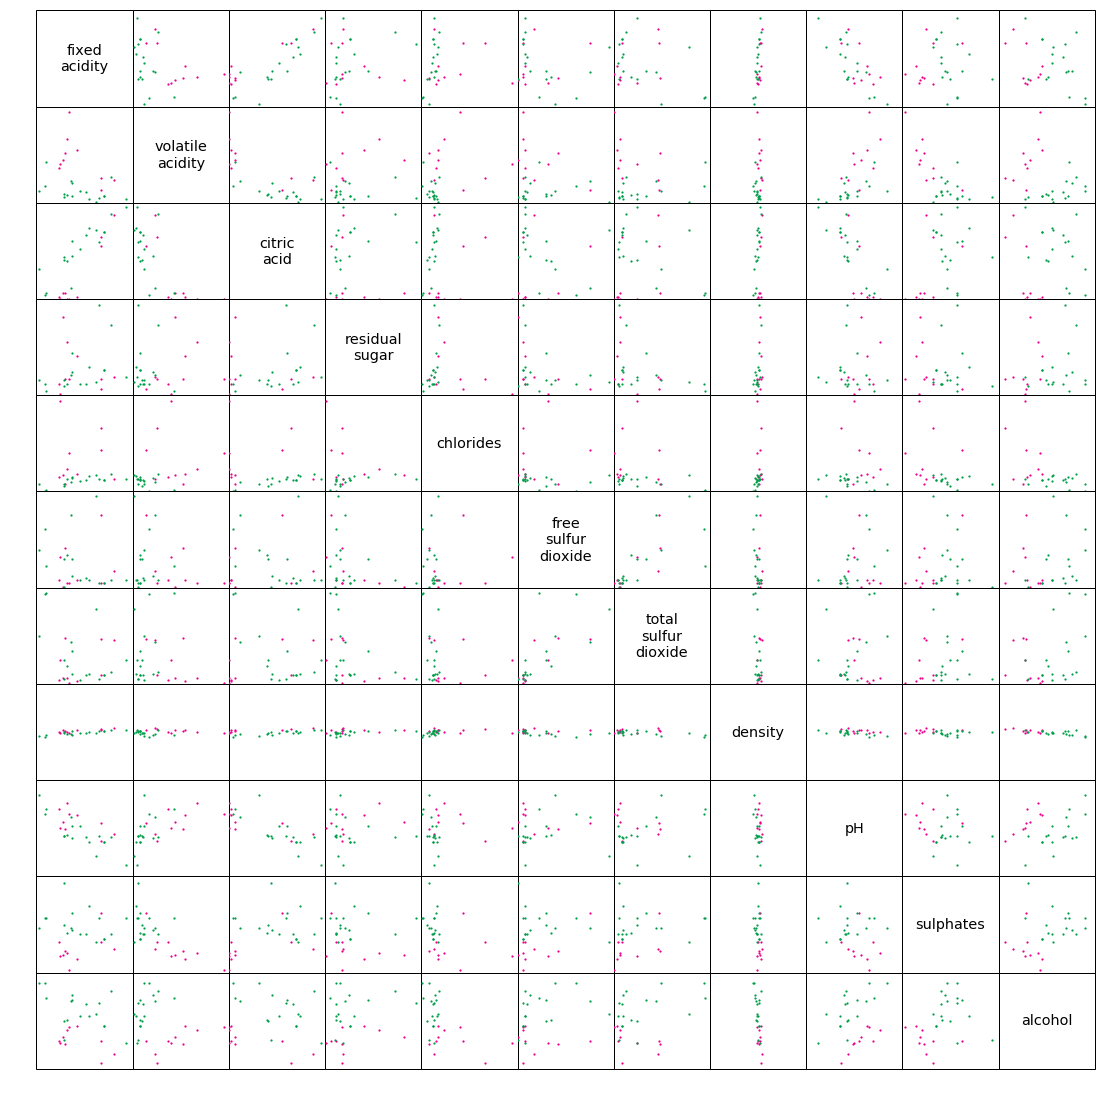

In [157]:
import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=";")

plot_scatter_matrix(df, 7, 4, False)

pH and alcohol is most useful to split wines by quality, because they perfectly visualy divided on two different zones.

# V.2 Learning to perceptron

## a) Implement a perceptron b) Implement a function to train your perceptron

In [158]:
import random
random.seed(24679)

def inf_generator():
    i = 0
    while True:
        yield i
        i += 1

In [159]:
class Perceptron(object):
    """
    Perceptron with Rosenblatt perceptron learning rule and Heaviside step activation function
    """
    
    def __init__(self, inputs_count):
        self.w = [random.random()] * inputs_count
        self.bias = random.random()
        
    def predict(self, row):
        """
        Predict function of perceptron
            @row - array of input values
            
            @return a result of 0 and 1, where 1 - wine is good, 0 - wine is bad
        """
        result = 0.0
        for i in range(len(self.w)):
            result += self.w[i] * row[i]
        result += self.bias
        return (1 if result >= 0.0 else 0)

    def learn(self, data, target, epochs_count = 0, eta = 0.01):
        """
        Learn function for training perceptron
            @data - samples
            @target - target values
            @epochs_count - number of training epochs
            @eta - learning rate (between 0.0 and 1.0)
            
            @return a list of (current_epoch, num_errors_at_epoch_end, [array_of_weights], bias)
        """
        result = []
        for i in inf_generator() if epochs_count == 0 else range(epochs_count):
            errors = 0
            for d, t in zip(data, target):
                value = eta * (t - self.predict(d))
                self.w += value * d
                self.bias += value
                errors += int(value != 0.0)
            tpl = (i, errors, self.w, self.bias)
            result.append(tpl);
            if (epochs_count == 0 and errors == 0):
                break
        return result
    
       

In [160]:
good = 7
bad = 4

import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=";")

data = df.loc[(df['quality'] > good) | (df['quality'] < bad),['pH', 'alcohol', 'quality']]
quality = data['quality']
quality = quality.apply(lambda x: (1 if x > good else 0))

perceptron = Perceptron(2)
a = perceptron.learn(data.loc[:, ['pH', 'alcohol']].values, quality.values)


## c) Write a function that will take the output of your perceptron training function and your red wine data and generate two plots in one figure

In [161]:
import matplotlib.pyplot as plt

def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    """
    Plot the perfomance of our perceptron or adaline.
    This function will produce a two plot fugure:
    1) Classification Errors vs Epochs
    2) Decisions boundary for two factors
    """
    errors = []
    for tpl in performance:
        errors.append(tpl[1])
    tpl = performance[epoch] if epoch != -1 else performance[len(performance) - 1]
    fig, axes = plt.subplots(1, 2, figsize=(15, 4), facecolor='w')
    ax = axes[0]
    ax.set_title("Errors as a function of epoch")
    ax.set_xlabel("epoch")
    ax.set_ylabel("classification errors")
    ax.plot(range(performance[len(performance) - 1][0]), errors[1:])
    ax.tick_params(direction='out', right=False, top=False)
    ax = axes[1]
    ax.set_title('Decision boundary on epoch: {}'.format(tpl[0]))
    ax.set_ylabel(wine_data.columns[0])
    ax.set_xlabel(wine_data.columns[1])
    y1 = wine_data[wine_data['quality'] < bad_thresh][wine_data.columns[0]]
    x1 = wine_data[wine_data['quality'] < bad_thresh][wine_data.columns[1]]
    y2 = wine_data[wine_data['quality'] > good_thresh][wine_data.columns[0]]
    x2 = wine_data[wine_data['quality'] > good_thresh][wine_data.columns[1]]
    min_x = x1.min()
    if (min_x > x2.min()):
        min_x = x2.min()
    max_x = x1.max()
    if (max_x < x2.max()):
        max_x = x2.max()
    ax.set_xlim(left=min_x*0.95, right=max_x*1.05)
    min_y = y1.min()
    if (min_y > y2.min()):
        min_y = y2.min()
    max_y = y1.max()
    if (max_y < y2.max()):
        max_y = y2.max()
    ax.set_ylim(bottom=min_y*0.95, top=max_y*1.05)
    
    a = -(tpl[3]/tpl[2][0])/(tpl[3]/tpl[2][1])
    b = -tpl[3]/tpl[2][0]
    x = [0] * 2
    y = [0] * 2
    x[0] = min_x * 0.95
    y[0] = a * x[0] + b
    x[1] = max_x * 1.05
    y[1] = a * x[1] + b
    ax.plot(x, y, '--', label="Decision Boundary", alpha=0.8)
    ax.fill_between(x, y, max_y + 2, where=y<max_y + 2, facecolor='#EC008C', alpha=.15)
    ax.fill_between(x, y, min_y - 2, where=y>min_y - 2, facecolor='#009E49', alpha=.15)
    ax.scatter(x1, y1, marker='o', s=20, linewidths=0, c='#EC008C', label='bad wines (<{} score)'.format(bad_thresh))
    ax.scatter(x2, y2, marker='o', s=20, linewidths=0, c='#009E49', label='good wines (>{} score)'.format(good_thresh))
    ax.tick_params(direction='out', right=False, top=False)
    lgd = ax.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', scatterpoints=1)
    plt.tight_layout()
    if (save_plot == False):
        plt.show()
    else:
       fig.savefig("./perfomance.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

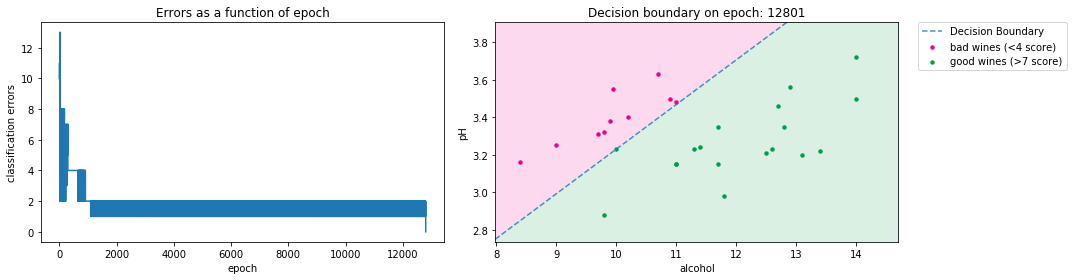

In [162]:
plot_performance(performance=a, wine_data=df.loc[:,['pH', 'alcohol', 'quality']], good_thresh=good, bad_thresh=bad)

## d) Feature Scaling

In [163]:
def mean(data):
    return (sum(data) / len(data))

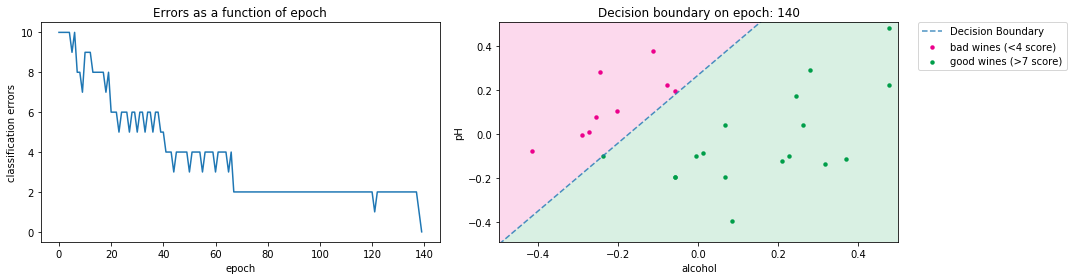

In [164]:
data_scaled = data.copy()
range_0 = data_scaled['pH'].max() - data_scaled['pH'].min()
range_1 = data_scaled['alcohol'].max() - data_scaled['alcohol'].min()
mean0 = mean(data_scaled['pH'])
mean1 = mean(data_scaled['alcohol'])
for i in range(len(data_scaled)):
    data_scaled['pH'].values[i] = (data_scaled['pH'].values[i] - mean0) / range_0
    data_scaled['alcohol'].values[i] = (data_scaled['alcohol'].values[i] - mean1) / range_1

perceptron_scaled = Perceptron(2)
b = perceptron_scaled.learn(data_scaled.loc[:, ['pH', 'alcohol']].values, quality.values)
plot_performance(performance=b, wine_data=data_scaled, good_thresh=good, bad_thresh=bad)

# V.3 My fair ADALINE

## a) Wines with a score of 4 and lower, and wines with a score of 7 and higher

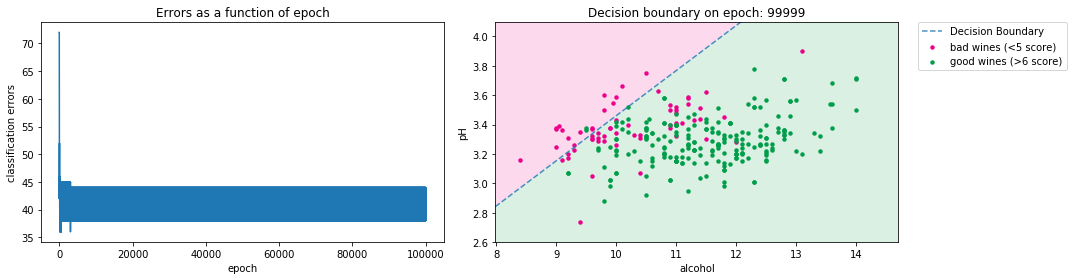

In [165]:
good2 = 6
bad2 = 5

import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=";")

data2 = df.loc[(df['quality'] > good2) | (df['quality'] < bad2),['pH', 'alcohol', 'quality']]
quality2 = data2['quality']
quality2 = quality2.apply(lambda x: (1 if x > good2 else 0))

perceptron = Perceptron(2)
a2 = perceptron.learn(data2.loc[:, ['pH', 'alcohol']].values, quality2.values, epochs_count=100000)
plot_performance(performance=a2, wine_data=data2, good_thresh=good2, bad_thresh=bad2)

Perceptron can't find right prediction, because result of prediction is discrete (0 or 1), so errors never equal 0. I try to test 100000 epochs (see the plots below)

## b) Implement an ADALINE  c) Implement a function to train your ADALINE

In [166]:
import math as math

def make_2d(a):
    result = []
    for x in a:
        result.append([x])
    return result

def l_plus(a, b):
    result = []
    try:
        len(a[0])
    except TypeError:
        a = make_2d(a)
    try:
        len(b[0])
    except TypeError:
        b = make_2d(b)
    for i in range(len(a)):
        res = []
        for j in range(len(a[0])):
            res.append(a[i][j] + b[i][j])
        result.append(res)
    return result

def l_minus(a, b):
    result = []
    try:
        len(a[0])
    except TypeError:
        a = make_2d(a)
    try:
        len(b[0])
    except TypeError:
        b = make_2d(b)
    for i in range(len(a)):
        res = []
        for j in range(len(a[0])):
            res.append(a[i][j] - b[i][j])
        result.append(res)
    return result

def l_plus_c(a, c):
    result = []
    for i in range(len(a)):
        res = a[i] + c
        result.append(res)
    return result

def l_T(a):
    result = []
    for j in range(len(a[0])):
        result.append([x[j] for x in a])
    return result

def l_mult_c(a, c):
    result = []
    for x in a:
        y = 0;
        try:
            y = x[0]
        except TypeError:
            y = x
        result.append([y * c])
    return result

def l_dot(a, b):
    result = []
    try:
        len(a[0])
    except TypeError:
        a = make_2d(a)
    try:
        len(b[0])
    except TypeError:
        b = make_2d(b)
    for i in range(len(a)):
        res = []
        for j in range(len(b[0])):
            t = 0
            for x, y in zip(a[i], b):
                t += (x * y[j]) 
            res.append(t)
        result.append(res)
    return result

def mult_and_sum(a, b):
    result = 0
    for i in range(len(a)):
        result += a[i] * b[i]
    return result

def eq(a, b, eta):
    return sum(list(map(lambda x, y: int(abs(x - y) < eta), a, b))) == len(a)

def flat(a):
    result = []
    for x in a:
        result.append(x[0])
    return result

In [167]:
class Adaline(object):
    """
    ADALINE with Widrow-Hoff learning rule and linear activation function and some kind of quantizer
    """
    
    def __init__(self, inputs_count, seed):
        random.seed(seed)
        self.w = []
        for i in range(inputs_count):
            self.w.append(random.random())
        self.bias = random.random()
        
    def _net_input(self, data):
        return mult_and_sum(self.w, data) + self.bias
    
    def _activation_function(self, data):
        net_input = self._net_input(data)
        return 1 / (1 + math.exp(-(net_input)))
    
    def predict(self, data):
        result = self._activation_function(data)
        return (1 if result >= 0.5 else 0)

    def accuracy(self, data, target):
        result = 0
        for X, y in zip(data, target):
            result += int(self.predict(X) == y)
        return result / len(target)
    
    def learn(self, data, target, epochs_count = 0, eta = 0.01, batch = False):
        """
        Learn function for training ADALINE
            @data - samples
            @target - target values
            @epochs_count - number of training epochs
            @eta - learning rate (between 0.0 and 1.0)
            @batch - batch or online learning
            
            @return a list of (current_epoch, num_errors_at_epoch_end, [array_of_weights], bias, cost)
        """
        result = []
        for i in inf_generator() if epochs_count == 0 else range(epochs_count):
            errors = []
            for X, y in zip(data, target):
                e = y - self._activation_function(X)
                errors.append(e)
                if (batch == False):
                    self.w = self.w + eta * e * X
                    self.bias = self.bias + eta * e
            if (batch == True):
                self.w = flat(l_plus(l_mult_c(l_dot(l_T(data), errors), eta), self.w)) #self.w + eta * mult_and_sum(X, errors)
                self.bias = self.bias + eta * sum(errors)
            cost = sum(x**2 for x in errors) / 2.0
            ac = self.accuracy(data, target)
            tpl = (i, (1 - ac) * len(target), self.w, self.bias, cost)
            if (epochs_count == 0 and (sum(errors) == 0 or
                (i > 2 and (eq(self.w, result[i - 1][2], eta) or (tpl[1] > result[i - 1][1]))))):
                break
            result.append(tpl);
        return result


## d) What is the good learning rate for ADALINE? Plot number of classification errors vs. epoch and decision boundary. What setting give the smallest number of classification errors?


Learning rate = 0.001


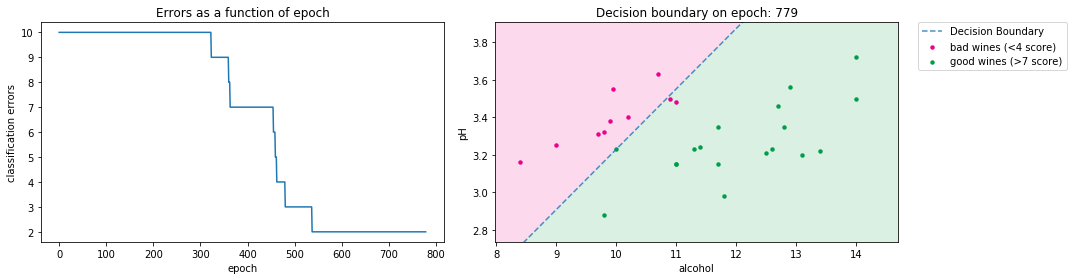

Learning rate = 0.0005


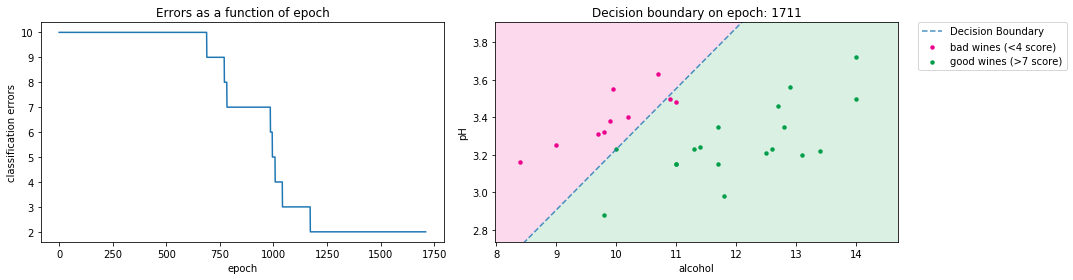

Learning rate = 0.0001


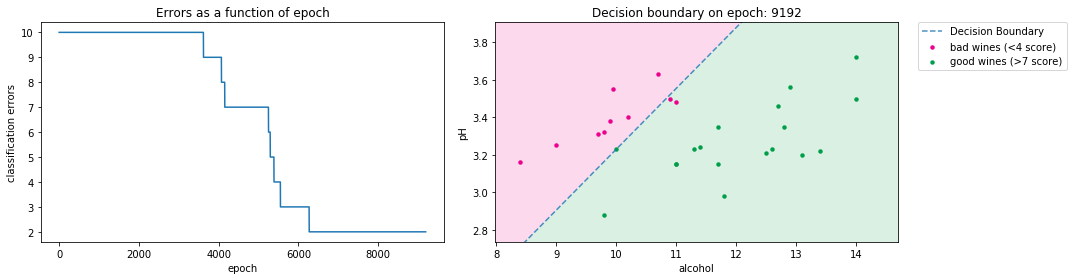

In [168]:
good = 7
bad = 4

import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=";")

data = df.loc[(df['quality'] > good) | (df['quality'] < bad),['pH', 'alcohol', 'quality']]
quality = data['quality']
quality = quality.apply(lambda x: (1 if x > good else 0))

print()
print("Learning rate = 0.001")
adaline001 = Adaline(2, 970642)
a001 = adaline001.learn(data.loc[:, ['pH', 'alcohol']].values, quality.values, eta=0.001, epochs_count=0)
plot_performance(performance=a001, wine_data=df.loc[:,['pH', 'alcohol', 'quality']], good_thresh=good, bad_thresh=bad)

print("Learning rate = 0.0005")
adaline0005 = Adaline(2, 970642)
a0005 = adaline0005.learn(data.loc[:, ['pH', 'alcohol']].values, quality.values, eta=0.0005, epochs_count=0)
plot_performance(performance=a0005, wine_data=df.loc[:,['pH', 'alcohol', 'quality']], good_thresh=good, bad_thresh=bad)

print("Learning rate = 0.0001")
adaline0001 = Adaline(2, 970642)
a0001 = adaline0001.learn(data.loc[:, ['pH', 'alcohol']].values, quality.values, eta=0.0001, epochs_count=0)
plot_performance(performance=a0001, wine_data=df.loc[:,['pH', 'alcohol', 'quality']], good_thresh=good, bad_thresh=bad)


In [169]:
tpl = a001[len(a001) - 1]
a = -(tpl[3]/tpl[2][0])/(tpl[3]/tpl[2][1])
b = -tpl[3]/tpl[2][0]
print()
print ('Learning rate = 0.001: a={:.4f}, b={:.4f}'.format(a, b))
tpl = a0005[len(a0005) - 1]
a = -(tpl[3]/tpl[2][0])/(tpl[3]/tpl[2][1])
b = -tpl[3]/tpl[2][0]
print ('Learning rate = 0.0005: a={:.4f}, b={:.4f}'.format(a, b))
tpl = a0001[len(a0001) - 1]
a = -(tpl[3]/tpl[2][0])/(tpl[3]/tpl[2][1])
b = -tpl[3]/tpl[2][0]
print ('Learning rate = 0.0001: a={:.4f}, b={:.4f}'.format(a, b))



Learning rate = 0.001: a=0.3220, b=0.0100
Learning rate = 0.0005: a=0.3236, b=-0.0059
Learning rate = 0.0001: a=0.3247, b=-0.0167


**You can see that a, b for decision boundary the almost same for all ETAs.**


Learning rate = 0.001
Accuracy of prediction = 0.8929


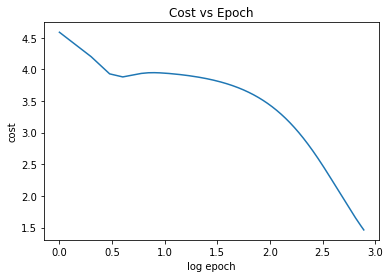

Learning rate = 0.0005
Accuracy of prediction = 0.8929


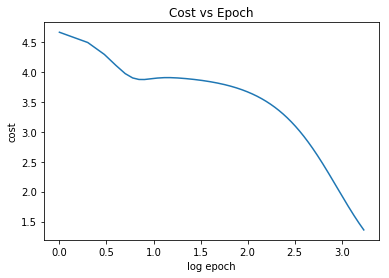

Learning rate = 0.0001
Accuracy of prediction = 0.8929


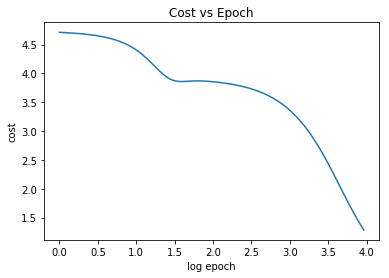

In [170]:
import math as m
def plot_cost_vs_epoch(cost, epoch):
    plt.plot(epoch, cost)
    plt.title("Cost vs Epoch")
    plt.xlabel("log epoch")
    plt.ylabel("cost")
    plt.show()
    
print()
print("Learning rate = 0.001")
print('Accuracy of prediction = {:0.4f}'.format(adaline001.accuracy(data.loc[:, ['pH', 'alcohol']].values, quality.values)))
plot_cost_vs_epoch([x[4] for x in a001], [m.log10(x[0] + 1) for x in a001])

print("Learning rate = 0.0005")
print('Accuracy of prediction = {:0.4f}'.format(adaline0005.accuracy(data.loc[:, ['pH', 'alcohol']].values, quality.values)))
plot_cost_vs_epoch([x[4] for x in a0005], [m.log10(x[0] + 1) for x in a0005])

print("Learning rate = 0.0001")
print('Accuracy of prediction = {:0.4f}'.format(adaline0001.accuracy(data.loc[:, ['pH', 'alcohol']].values, quality.values)))
plot_cost_vs_epoch([x[4] for x in a0001], [m.log10(x[0] + 1) for x in a0001])

**How you can see, accuracy the same, but cost drops fastest when ETA=0.001.**

# V.4 Advanced wine sampling and resampling

In [171]:
good = 7
bad = 5

import pandas as pd
df = pd.read_csv('winequality-red.csv', sep=";")
data = df.loc[(df['quality'] > good) | (df['quality'] < bad),['pH', 'alcohol', 'quality']]

In [172]:
import matplotlib.pyplot as plt

def scatter_wine_data(ax, data, good):
    c = ['#EC008C', '#009E49']
    colors = []
    for x in data[data.columns[2]]:
        colors.append(c[1] if x > good else c[0])
    ax.scatter(data[data.columns[1]], data[data.columns[0]], marker='o', s=20, linewidths=0, c=colors)

def plot_training_validation(data, good):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4), facecolor='w')
    for i in range(2):
        ax = axes[i]
        ax.set_title("Training" if i == 0 else "Validation")
        ax.set_xlabel(data[i].columns[1])
        ax.set_ylabel(data[i].columns[0])
        ax.tick_params(direction='out', right=False, top=False)
        scatter_wine_data(ax, data[i], good)
    plt.tight_layout()
    plt.show()

def plot_decision_boundary(data, tpl, good):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4), facecolor='w')
    for i in range(2):
        ax = axes[i]
        min_x = data[i][data[i].columns[1]].min()
        max_x = data[i][data[i].columns[1]].max()
        ax.set_xlim(left=min_x*0.95, right=max_x*1.05)
        min_y = data[i][data[i].columns[0]].min()
        max_y = data[i][data[i].columns[0]].max()
        ax.set_ylim(bottom=min_y*0.95, top=max_y*1.05)
        ax.set_title("Training" if i == 0 else "Validation")
        ax.set_xlabel(data[i].columns[1])
        ax.set_ylabel(data[i].columns[0])
        ax.tick_params(direction='out', right=False, top=False)
        scatter_wine_data(ax, data[i], good)
        a = -(tpl[3]/tpl[2][0])/(tpl[3]/tpl[2][1])
        b = -tpl[3]/tpl[2][0]
        x = [0] * 2
        y = [0] * 2
        x[0] = min_x * 0.95
        y[0] = a * x[0] + b
        x[1] = max_x * 1.05
        y[1] = a * x[1] + b
        ax.plot(x, y, '--', alpha=0.8)
        ax.fill_between(x, y, max_y + 2, where=y<max_y + 2, facecolor='#EC008C', alpha=.15)
        ax.fill_between(x, y, min_y - 2, where=y>min_y - 2, facecolor='#009E49', alpha=.15)
    plt.tight_layout()
    plt.show()


## a) Write a function that uses the holdout method to partition data into a training and a validation set.

In [173]:
def holdout_partition(data, part = 0.7):
    """
    Split data uses holdout method
        @data - DataFrame
        @part - part of training dataset (> 0 and < 1)
        
        @return tuple of training and validation datasets
    """
    training = data.sample(frac=part)
    validation = data.query('index not in @training.index')
    return (training, validation)


Splitting data with holdout method


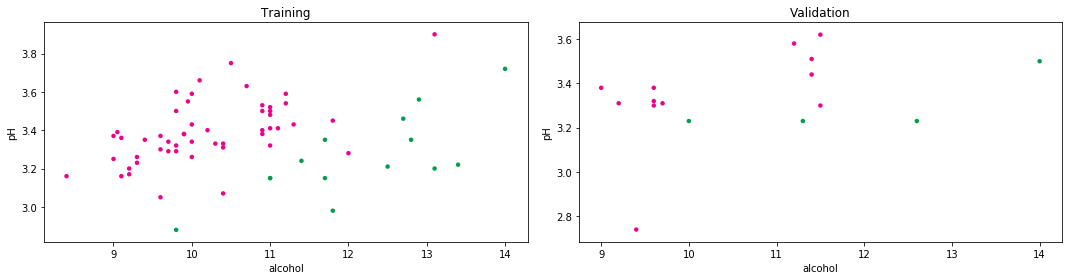

	Accuracy of prediction on validation data = 0.8750


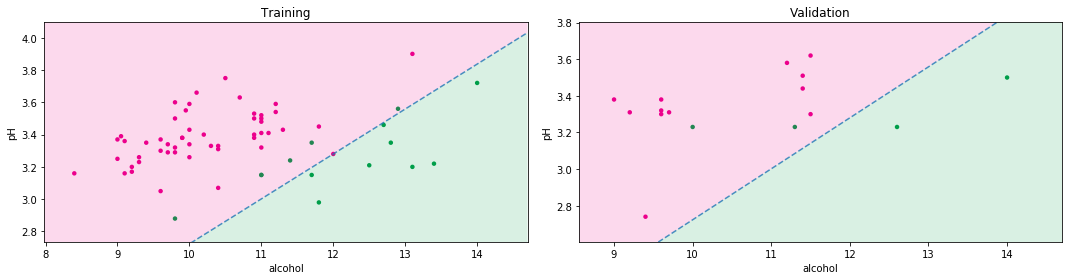

In [174]:
hdata = holdout_partition(df.loc[(df['quality'] > good) | (df['quality'] < bad),['pH', 'alcohol', 'quality']], 0.8)
hq = hdata[0]['quality']
hq = hq.apply(lambda x: (1 if x > good else 0))

print("\nSplitting data with holdout method")
plot_training_validation(hdata, good)
ad_holdout = Adaline(2, 240679)
a_holdout = ad_holdout.learn(hdata[0].loc[:, ['pH', 'alcohol']].values, hq.values, eta=0.001, epochs_count=0)
print('\tAccuracy of prediction on validation data = {:0.4f}'.format(ad_holdout.accuracy(hdata[1].loc[:, ['pH', 'alcohol']].values, 
    hdata[1]['quality'].apply(lambda x: (1 if x > good else 0)))))
plot_decision_boundary(tpl=a_holdout[len(a_holdout) - 1], data=hdata, good=good)


## b) Write a function that generates a k-fold cross-validation dataset

In [175]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [176]:
def k_fold_partition(data, k = 5, shuffle = False):
    """
    Generate k-fold cross-validation dataset
        @data - DataFrame
        @k - number of sets
        @shuffle - shuffle data before creating k-folds
        
        @return k tuples of training and validation datasets
    """
    if (shuffle == True):
        data = data.sample(frac=1)
    result = []
    fold_length = data.shape[0] / k
    end = 0.0
    for i in range(k):
        start = end
        end = round(start + fold_length) if i + 1 < k else data.shape[0]
        validation = data[int(start):int(end)]
        training = data.query('index not in @validation.index')
        result.append((training, validation))
    return result


Splitting data with k-fold method

Fold 1
	Accuracy of prediction on validation data = 1.0000


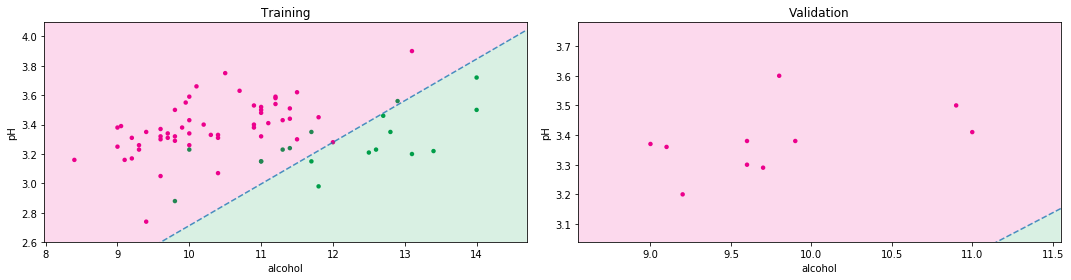


Fold 2
	Accuracy of prediction on validation data = 0.9000


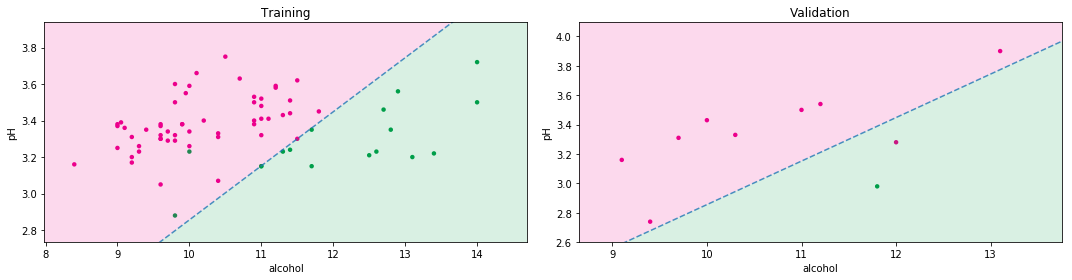


Fold 3
	Accuracy of prediction on validation data = 0.9000


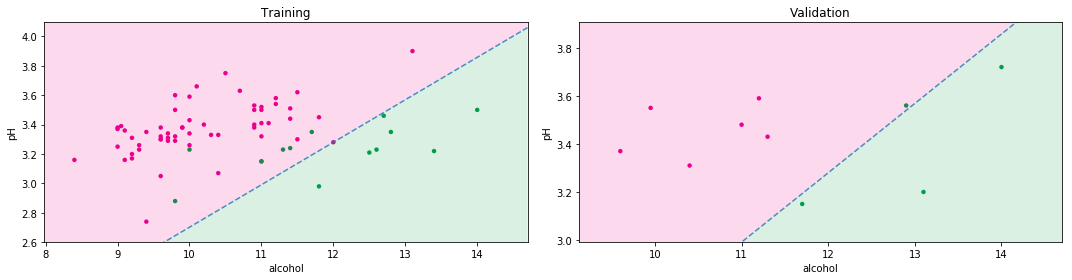


Fold 4
	Accuracy of prediction on validation data = 0.8000


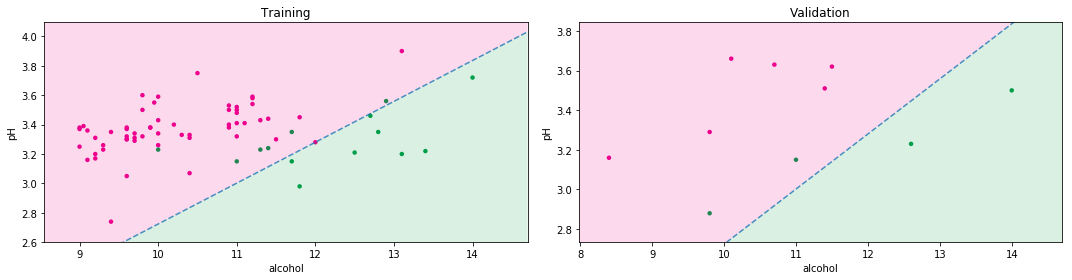


Fold 5
	Accuracy of prediction on validation data = 0.8000


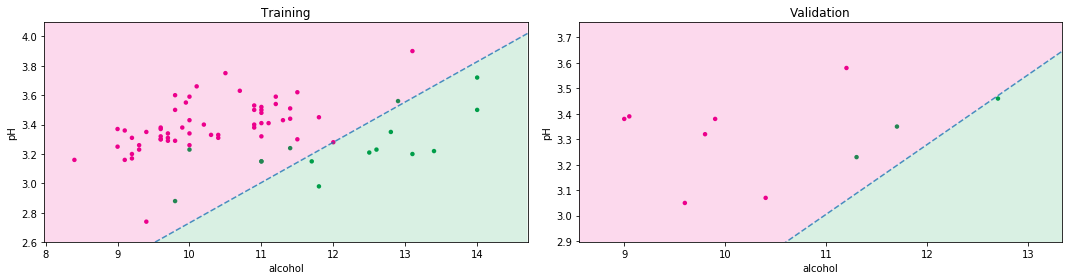


Fold 6
	Accuracy of prediction on validation data = 0.9000


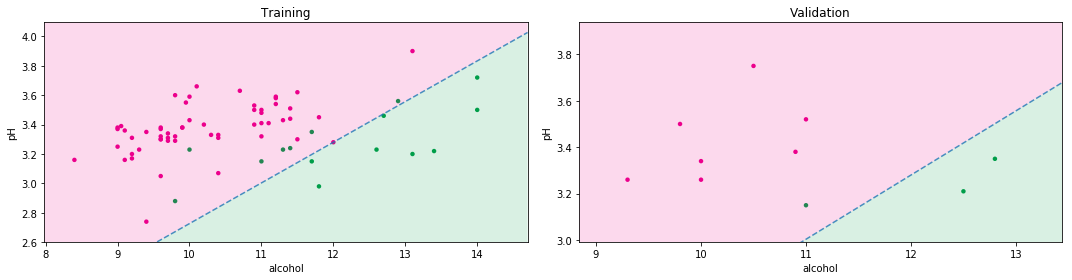


Fold 7
	Accuracy of prediction on validation data = 0.8000


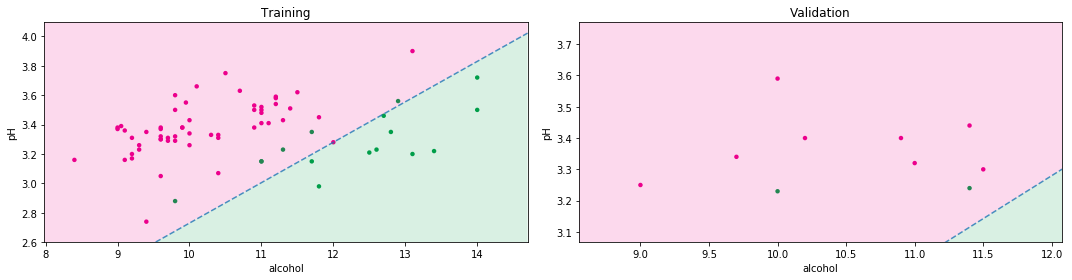


Fold 8
	Accuracy of prediction on validation data = 1.0000


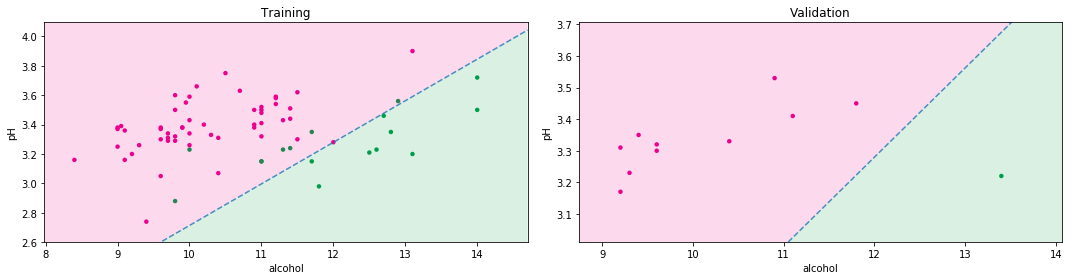

In [177]:
k = 8
kdata = k_fold_partition(df.loc[(df['quality'] > good) | (df['quality'] < bad),['pH', 'alcohol', 'quality']], k, True)
print("\nSplitting data with k-fold method")

for i in range(k):
    print('\nFold {}'.format(i + 1))
    kq = kdata[i][0]['quality']
    kq = kq.apply(lambda x: (1 if x > good else 0))
    ad_kfold = Adaline(2, random.randrange(100000))
    a_kfold = ad_kfold.learn(kdata[i][0].loc[:, ['pH', 'alcohol']].values, kq.values, eta=0.001, epochs_count=0)
    print('\tAccuracy of prediction on validation data = {:0.4f}'.format(ad_kfold.accuracy(kdata[i][1].loc[:, ['pH', 'alcohol']].values, 
        kdata[i][1]['quality'].apply(lambda x: (1 if x > good else 0)))))
    plot_decision_boundary(tpl=a_kfold[len(a_kfold) - 1], data=kdata[i], good=good)


## c) Write a function that will train and assess the ADALINE on each training and cross-validation fold

In [178]:
def adaline_cross_validation(kdata, columns, epochs_count = 0, eta = 0.001, batch = False):
    accuracy = 0
    for i in range(len(kdata)):
        kq = data[i][0]['quality']
        kq = kq.apply(lambda x: (1 if x > good else 0))
        ad_kfold = Adaline(2, random.randrange(100000))
        a_kfold = ad_kfold.learn(kdata[i][0].loc[:, columns].values, kq.values,
                                 eta=eta, epochs_count=epochs_count, batch=batch)
        accuracy += ad_kfold.accuracy(kdata[i][1].loc[:, columns].values, 
            kdata[i][1]['quality'].apply(lambda x: (1 if x > good else 0)))
    return accuracy / len(kdata)
    

In [191]:
bad = 5
good = 7

k = 8

data = k_fold_partition(df.loc[(df['quality'] > good) | (df['quality'] < bad),['pH', 'alcohol', 'quality']], k, True)

params = [50, 0.0001]
print('Accuracy(epoch={0}, eta={1}) = {2:.3f}'.format(params[0], params[1],
      adaline_cross_validation(data, ['pH', 'alcohol'], params[0], params[1])))
params = [200, 0.005]
print('Accuracy(epoch={0}, eta={1}) = {2:.3f}'.format(params[0], params[1],
      adaline_cross_validation(data, ['pH', 'alcohol'], params[0], params[1])))
params = [500, 0.001]
print('Accuracy(epoch={0}, eta={1}) = {2:.3f}'.format(params[0], params[1],
      adaline_cross_validation(data, ['pH', 'alcohol'], params[0], params[1])))
params = [1000, 0.05]
print('Accuracy(epoch={0}, eta={1}) = {2:.3f}'.format(params[0], params[1],
      adaline_cross_validation(data, ['pH', 'alcohol'], params[0], params[1])))
params = [2000, 0.0001]
print('Accuracy(epoch={0}, eta={1}) = {2:.3f}'.format(params[0], params[1],
      adaline_cross_validation(data, ['pH', 'alcohol'], params[0], params[1])))
params = [200, 0.05]
print('Accuracy(epoch={0}, eta={1}) = {2:.3f}'.format(params[0], params[1],
      adaline_cross_validation(data, ['pH', 'alcohol'], params[0], params[1])))


Accuracy(epoch=50, eta=0.0001) = 0.777
Accuracy(epoch=200, eta=0.005) = 0.901
Accuracy(epoch=500, eta=0.001) = 0.876
Accuracy(epoch=1000, eta=0.05) = 0.926
Accuracy(epoch=2000, eta=0.0001) = 0.777
Accuracy(epoch=200, eta=0.05) = 0.901


**Optimal result is for epoch=200, eta=0.05. Number of epoch enough for training, learning rate produce good accuracy.**